### Do it! 실습 | 나이 변수 검토 및 전처리 하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 데이터 불러오기
raw_welfare = pd.read_spss('/Users/heohyeonjun/Desktop/We_IT_5th/weit/Data/Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare = raw_welfare.copy()

In [3]:
welfare = welfare.rename(
    columns = {
        'h14_g3' : 'sex', # 성별
        'h14_g4' : 'birth', # 태어난 연도
        'h14_g10' : 'merrage_type', # 혼인 상태
        'h14_g11' : 'religion', # 종교
        'p1402_8aq1' : 'income', # 월급
        'h14_eco9' : 'code_job', # 직업 코드
        'h14_reg7' : 'code_region' # 지역 코드
    }
)

In [4]:
welfare['birth'].dtypes # 변수 타입 출력

dtype('float64')

In [5]:
welfare['birth'].describe() # 변수 타입 출력

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<AxesSubplot:xlabel='birth', ylabel='Count'>

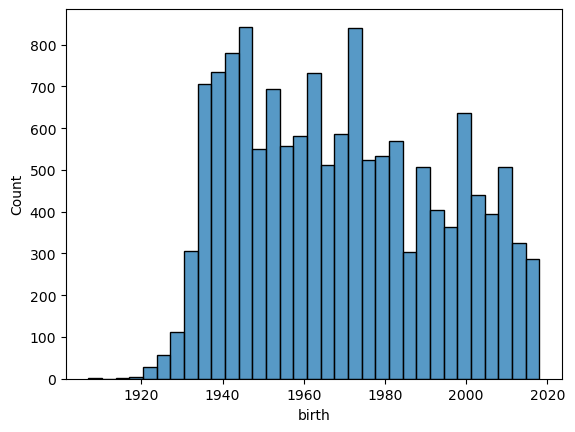

In [6]:
sns.histplot(data=welfare, x='birth') # 히스토그램 만들기

In [7]:
welfare['birth'].describe() # 이상치 확인

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [8]:
welfare['birth'].isna().sum()

0

In [9]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1) # 나이 변수 만들기
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

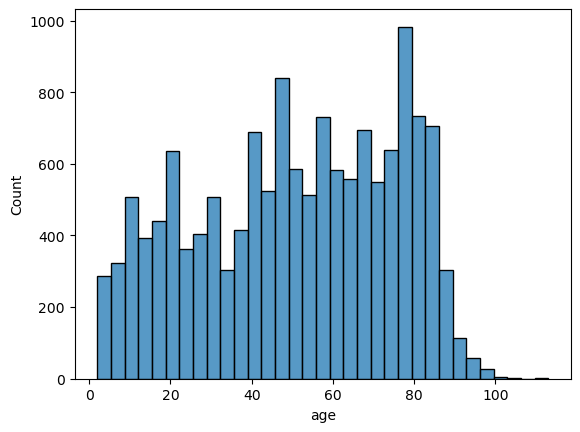

In [10]:
sns.histplot(data=welfare, x='age') # 히스토그램 만들기

### 나이와 월급의 관계 분석하기

In [14]:
# 나이별 월급 평균표 만들기
age_income = welfare.dropna(subset=['income']).groupby('age').agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<AxesSubplot:xlabel='age', ylabel='mean_income'>

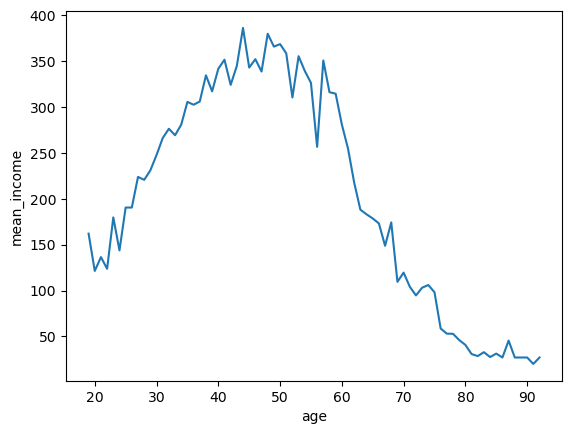

In [15]:
# 선그래프 만들기
sns.lineplot(data= age_income, x='age', y='mean_income')